# Módulo 01. Tasca 01. Bases datos relacionales SQL
## By José Manuel Castaño

## - Exercici 1

A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.

Para realizar los ejercicios utilizaremos 2 librerías: mysql.connector y sqlalchemy. Ambas son ORM (Object Relational Mapper) que permiten acceder y facilitar el trabajo con SQL. Además, sqlalchemy permite pasar a dataframes de forma sencilla

In [1]:
import pandas as pd
import mysql.connector
import sqlalchemy

In [14]:
#Inicializamos el conector mysql.connector
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
)
#Probamos el conector
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES")
for x in mycursor:
    print(x) 

('cursmysql',)
('information_schema',)
('mi_empresa',)
('mi_escuela',)
('mi_nueva_empresa',)
('movies',)
('movies_ini',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('test',)


In [15]:
#Inicializamos y probamos el conector sqlalchemy
engine = sqlalchemy.create_engine('mysql+mysqlconnector://root:@localhost/movies')
movie_df = pd.read_sql_table("tb_movie", engine)

movie_df.head()

,movie_id,movie_title,movie_date,movie_format,movie_genre_id,created_by_user,created_date,updated_date
0,1,Apocalypse Now,1979-05-10,Film,11,OS_SGAD,NaT,NaT
1,2,Star Wars:Episode IV - A New Hope,1977-05-25,Film,2,OS_SGAD,NaT,NaT
2,3,Indiana Jones and the Temple of Doom,1984-05-08,Film,1,OS_SGAD,NaT,NaT
3,4,The Terminal,2004-06-18,Digital,3,OS_SGAD,NaT,NaT
4,5,Jaws,1975-01-01,Film,10,OS_SGAD,NaT,NaT


### Esquema y explicación general de la base de datos movies

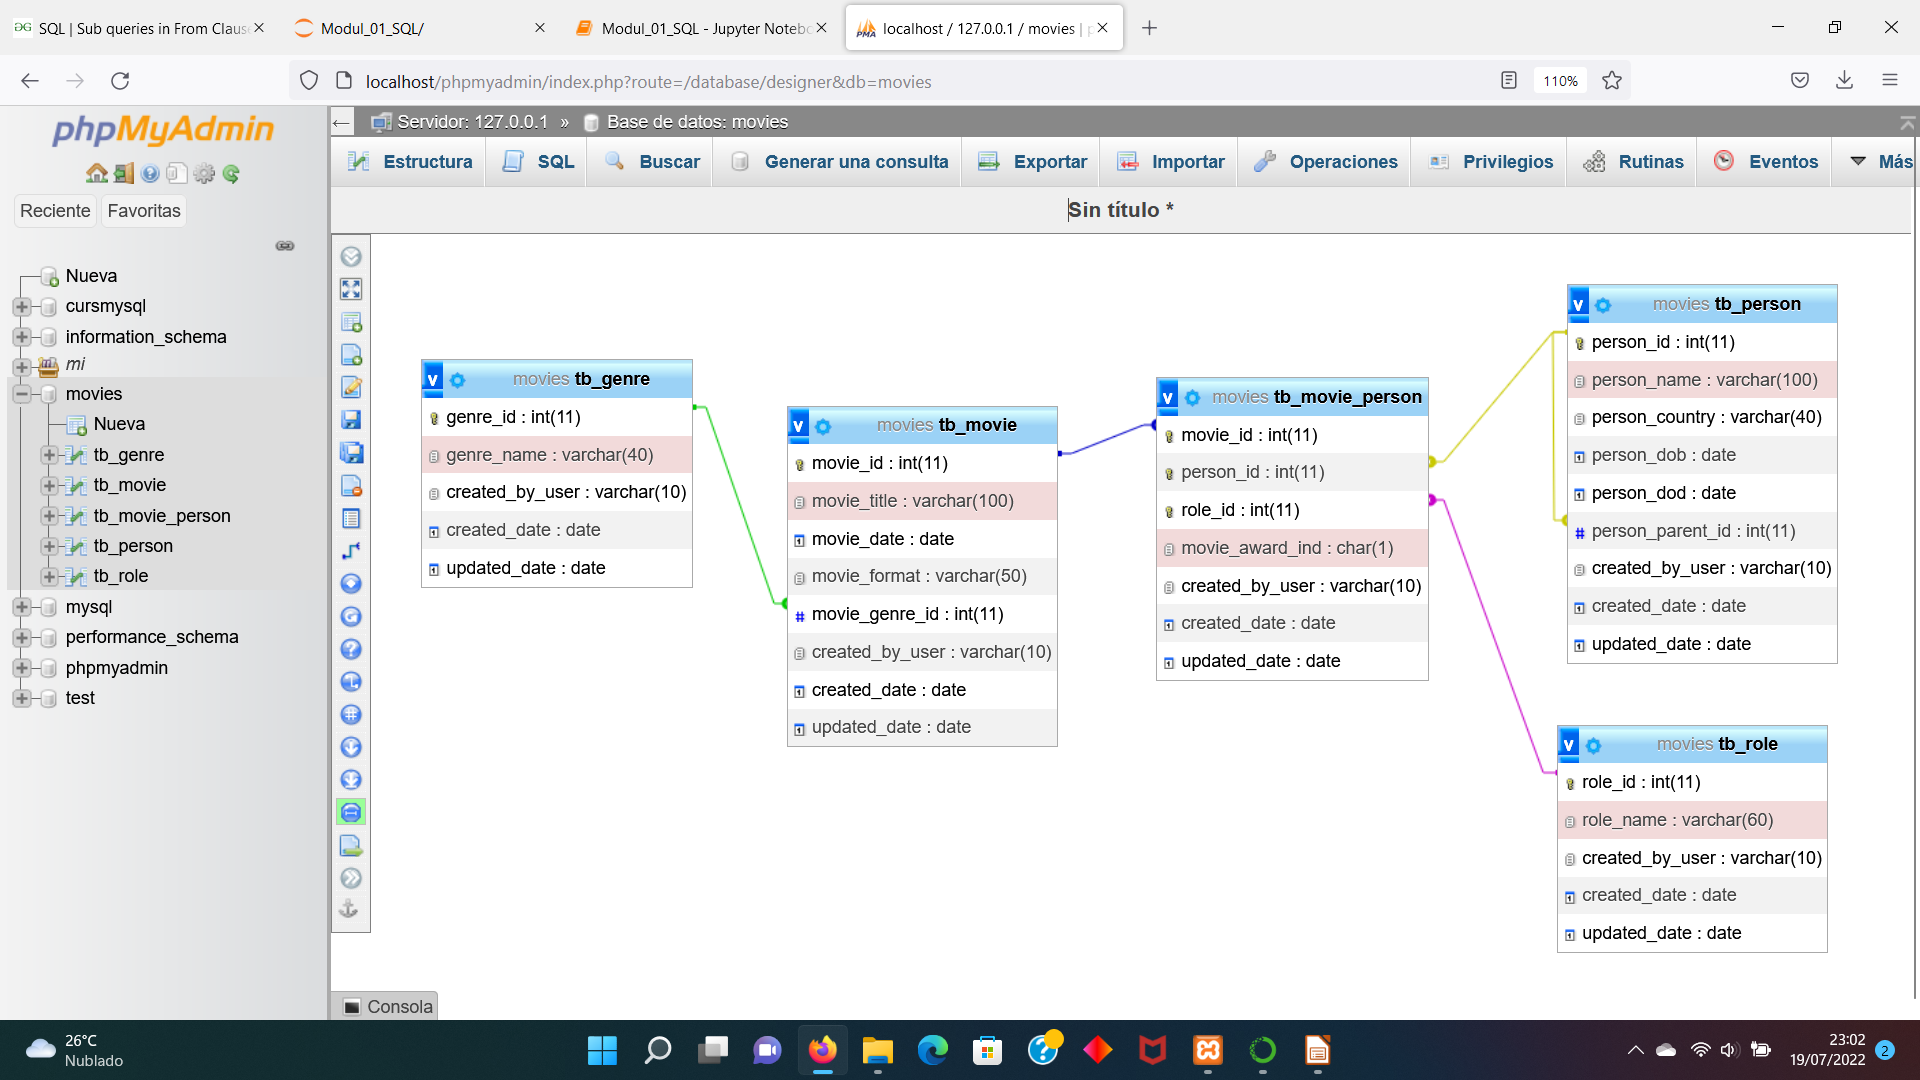

La base de datos movies consta de 5 tablas que contienen la siguiente información:
- **Tabla tb_movie**, que contiene las películas. Sus campos son
    - movie_id: clave primaria
    - movie_title: título de la película
    - movie_date: fecha de la película
    - movie_format: formato de la película (film, digital...)
    - movie_genre: clave foránea que apunta a la tabla tb_genre con los géneros de las películas
    - created_by_user: usuario creador de la tabla
    - created_date: fecha de creación de la tabla
    - update_date: fecha de actualización de la tabla

- **Tabla tb_genre**, que contiene los géneros de las películas. Sus campos son:
    - genre_id: clave primaria
    - genre_name: nombre del género de la película
    - created_by_user: usuario creador de la tabla
    - created_date: fecha de creación de la tabla
    - update_date: fecha de actualización de la tabla

- **Tabla tb_movie_person**, que relaciona las películas, las personas que han intervenido en la película y su rol en la película. Sus campos son:
    - movie_id: clave primaria y foránea. Apunta a la tabla tb_movie
    - person_id: clave primaria y foránea. Apunta a la tabla tb_person
    - role_id: clave primaria y foránea. Apunta a la tabla tb_role
    - movie_adward_ind: indica si ha tenido premio (Y) o no ha tenido premio (N)
    - created_by_user: usuario creador de la tabla
    - created_date: fecha de creación de la tabla
    - update_date: fecha de actualización de la tabla

- **Tabla tb_person**, que contiene las personas que intervienen en las películas. Sus campos son:
     - person_id: clave primaria
     - person_name: nombre de la persona
     - person_country: país de origen de la persona
     - person_dob: fecha de nacimiento de la persona
     - person_dod: fecha de fallecimiento de la persona (Null si está viva)
     - parent_id: clave foránea que apunta al person_id de la misma tabla. Indica si tiene relación de parentesco con otra persona de la tabla.
     - created_by_user: usuario creador de la tabla
     - created_date: fecha de creación de la tabla
     - update_date: fecha de actualización de la tabla

- **Tabla tb_role**, que contiene los roles de las personas en la película. Sus campos son:
    - role_id: clave primaria
    - role_name: nombre del rol
    - created_by_user: usuario creador de la tabla
    - created_date: fecha de creación de la tabla
    - update_date: fecha de actualización de la tabla


## - Exercici 2

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.


In [7]:
query2= '''SELECT person_name, person_country, person_dob, person_dod
        FROM tb_person
        WHERE person_dod is null
        ORDER BY person_dob;'''

personas_vivas= pd.read_sql_query(query2, engine)
personas_vivas

,person_name,person_country,person_dob,person_dod
0,John Williams,United States,1928-08-08,None
1,Vera Miles,United States,1929-08-23,None
2,Sean Connery,Scotland,1930-07-08,None
3,Robert Duvall,United States,1931-01-05,None
4,Morgan Freeman,United States,1935-10-01,None
5,Francis Ford Coppola,United States,1939-04-07,None
6,Gary Kurtz,United States,1940-07-27,None
7,Martin Sheen,United States,1940-08-03,None
8,Harrison Ford,United States,1942-07-13,None
9,George Lucas,United States,1944-05-14,None


## - Exercici 3

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.  

In [8]:
query3='''
SELECT genre_name, COUNT(movie_id) AS num_movies
FROM tb_genre 
LEFT JOIN tb_movie
ON tb_movie.movie_genre_id = tb_genre.genre_id
GROUP BY genre_name
ORDER BY num_movies DESC '''

movies_genre= pd.read_sql_query(query3, engine)
movies_genre

,genre_name,num_movies
0,Comedia,3
1,Suspense,2
2,Ciencia Ficción,2
3,Romance,2
4,Acción,2
5,Drama,2
6,Fantasía,1
7,Bélico,1
8,Terror,1
9,Melodrama,0


## - Exercici 4

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.

Para la primera parte del ejercicio realizaremos una subquery donde contamos el número de roles por nombre y movie. Posteriormente agrupamos por nombre obteniendo el número máximo de roles

In [10]:
query4='''
SELECT person_name, MAX(roles) as max_roles
FROM
    (SELECT person_name, movie_id, COUNT(role_id) AS roles
    FROM tb_person
    LEFT JOIN tb_movie_person
    ON tb_person.person_id = tb_movie_person.person_id
    GROUP BY person_name, movie_id) as tabla1
GROUP BY person_name
'''
max_rols= pd.read_sql_query(query4, engine)
max_rols

,person_name,max_roles
0,Alfred Joseph Hitchcock,3
1,Anthony Perkins,1
2,Bob Sheen,0
3,Carmen Machi,1
4,Carmine Coppola,1
5,Catherine Zeta-Jones,1
6,Charlie Sheen,1
7,Clara Lago,1
8,Dani Rovira,1
9,Daniel Sanchez Arevalo,2


Filtramos la anterior consulta mediante Having para obtener las personas que han tenido más de un rol en una misma movie

In [11]:
query4b='''
SELECT person_name, MAX(roles) as max_roles
FROM
    (SELECT person_name, movie_id, COUNT(role_id) AS roles
    FROM tb_person
    LEFT JOIN tb_movie_person
    ON tb_person.person_id = tb_movie_person.person_id
    GROUP BY person_name, movie_id) as tabla1
GROUP BY person_name
HAVING max_roles>1
'''
roles_mayor1= pd.read_sql_query(query4b, engine)
roles_mayor1

,person_name,max_roles
0,Alfred Joseph Hitchcock,3
1,Daniel Sanchez Arevalo,2
2,Francis Ford Coppola,3
3,George Lucas,2
4,Mel Gibson,2
5,Steven Spielberg,2


## - Exercici 5

Realitza la següent operació sobre la base de dades acabada de crear: 

Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.

In [16]:
insertar='''
INSERT INTO movies.tb_genre (genre_id, genre_name, created_by_user, created_date, updated_date)
VALUES (%s, %s, %s, %s, %s)
'''
mycursor.execute(insertar, ('69', 'Documental', 'OS_SGAD', '2022-07-19', '2022-07-19'))
mydb.commit()

In [17]:
genres= pd.read_sql_table("tb_genre", engine)
genres

,genre_id,genre_name,created_by_user,created_date,updated_date
0,1,Acción,OS_SGAD,NaT,NaT
1,2,Ciencia Ficción,OS_SGAD,NaT,NaT
2,3,Comedia,OS_SGAD,NaT,NaT
3,4,Drama,OS_SGAD,NaT,NaT
4,5,Fantasía,apermag,NaT,NaT
5,6,Melodrama,apermag,2018-09-01,2018-09-27
6,7,Musical,OS_SGAD,NaT,NaT
7,8,Romance,OS_SGAD,NaT,NaT
8,9,Suspense,OS_SGAD,NaT,NaT
9,10,Terror,OS_SGAD,NaT,NaT


## - Exercici 6

Fes la següent operació sobre la base de dades acabada de crear:  

Elimina la pel·lícula "La Gran Familia Española" de la base de dades.

Para eliminar una película de la tabla tb_movie es necesario previamente eliminar todos los registros que apuntan a dicha película de la tabla tb_movie_person ya que el campo movie_id es clave primaria de tb_movie_person

In [19]:
#Eliminamos movie_id=11 de la tabla movie_person
eliminar = '''
DELETE 
FROM movies.tb_movie_person
WHERE movie_id = 11;
'''
mycursor.execute(eliminar)
mydb.commit()


#Eliminamos movie_id=11 de la tabla movie
eliminar = '''
DELETE 
FROM movies.tb_movie
WHERE movie_id = 11;
'''
mycursor.execute(eliminar)
mydb.commit()

## - Exercici 7

Realitza la següent operació sobre la base de dades acabada de crear: 

Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.

In [21]:
cambio='''
UPDATE  movies.tb_movie 
SET movie_genre_id= 3
WHERE movie_id= 9
'''
mycursor.execute(cambio)
mydb.commit()

Hacemos una query para comprobar que se ha realizado el cambio

In [23]:
query7='''
SELECT movie_title, movie_genre_id, genre_name
FROM tb_movie
LEFT JOIN tb_genre
ON tb_movie.movie_genre_id= tb_genre.genre_id
'''
pelis= pd.read_sql_query(query7, engine)
pelis

,movie_title,movie_genre_id,genre_name
0,Apocalypse Now,11,Bélico
1,Star Wars:Episode IV - A New Hope,2,Ciencia Ficción
2,Indiana Jones and the Temple of Doom,1,Acción
3,The Terminal,3,Comedia
4,Jaws,10,Terror
5,ET The Extraterrestrial,5,Fantasía
6,Psycho,9,Suspense
7,Ocho Apellidos Vascos,3,Comedia
8,Ocho Apellidos Catalanes,3,Comedia
9,El otro lado de la cama,8,Romance
